<a href="https://colab.research.google.com/github/anujmittal2308/predict-the-price-of-the-S-P500-stock-market-index/blob/main/Equal_Weight_S%26P_500_Index_Fund.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import requests

import math

In [ ]:
!pip install xlsxwriter

In [ ]:
import xlsxwriter

Take a data using the yfinance package

In [ ]:
import yfinance as yf

In [ ]:
sp500=yf.Ticker("^GSPC")

In [ ]:
sp500=sp500.history(period="max")

In [ ]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-14 00:00:00-05:00,4458.970215,4508.669922,4458.970215,4495.700195,4700350000,0.0,0.0
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000,0.0,0.0
2023-11-16 00:00:00-05:00,4497.080078,4511.990234,4487.830078,4508.240234,3964520000,0.0,0.0


In [ ]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-11-07 00:00:00-05:00', '2023-11-08 00:00:00-05:00',
               '2023-11-09 00:00:00-05:00', '2023-11-10 00:00:00-05:00',
               '2023-11-13 00:00:00-05:00', '2023-11-14 00:00:00-05:00',
               '2023-11-15 00:00:00-05:00', '2023-11-16 00:00:00-05:00',
               '2023-11-17 00:00:00-05:00', '2023-11-20 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24088, freq=None)

##Cleaning and Visualizing our Stock Marrket Data


<Axes: xlabel='Date'>

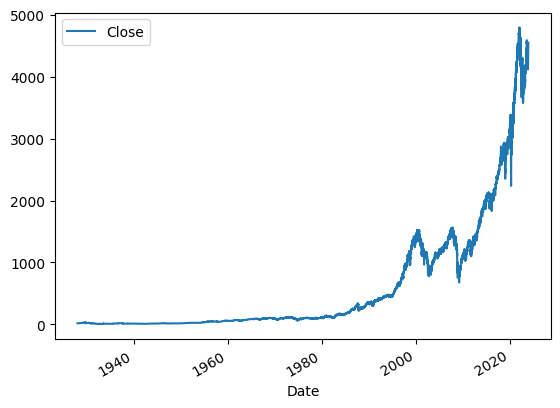

In [ ]:
sp500.plot.line(y="Close", use_index=True)

In [ ]:
del sp500['Dividends']

In [ ]:
del sp500['Stock Splits']

In [ ]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-11-14 00:00:00-05:00,4458.970215,4508.669922,4458.970215,4495.700195,4700350000
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000
2023-11-16 00:00:00-05:00,4497.080078,4511.990234,4487.830078,4508.240234,3964520000


In [ ]:
sp500["Tomorrow"]=sp500["Close"].shift(-1)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-11-14 00:00:00-05:00,4458.970215,4508.669922,4458.970215,4495.700195,4700350000,4502.879883
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000,4508.240234
2023-11-16 00:00:00-05:00,4497.080078,4511.990234,4487.830078,4508.240234,3964520000,4514.020020


In [ ]:
sp500['Target']=(sp500["Tomorrow"]>sp500["Close"]).astype(int)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-11-14 00:00:00-05:00,4458.970215,4508.669922,4458.970215,4495.700195,4700350000,4502.879883,1
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000,4508.240234,1
2023-11-16 00:00:00-05:00,4497.080078,4511.990234,4487.830078,4508.240234,3964520000,4514.020020,1


In [ ]:
 sp500=sp500.loc['1928-01-01':].copy()

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
1928-01-09 00:00:00-05:00,17.500000,17.500000,17.500000,17.500000,0,17.370001,0
...,...,...,...,...,...,...,...
2023-11-14 00:00:00-05:00,4458.970215,4508.669922,4458.970215,4495.700195,4700350000,4502.879883,1
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000,4508.240234,1
2023-11-16 00:00:00-05:00,4497.080078,4511.990234,4487.830078,4508.240234,3964520000,4514.020020,1


##   Training an initial machine learning model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model= RandomForestClassifier(n_estimators=100,min_samples_split=199,random_state=1)
train= sp500.iloc[:-100]
test=sp500.iloc[-100:]
predictors=["Close","Volume","Open","Low"]
model.fit(train[predictors],train["Target"])


RandomForestClassifier(min_samples_split=199, random_state=1)

In [ ]:
from sklearn.metrics import precision_score
preds=model.predict(test[predictors])

In [ ]:
preds=pd.Series(preds,index=test.index)

In [ ]:
preds

Date
2023-06-30 00:00:00-04:00    1
2023-07-03 00:00:00-04:00    0
2023-07-05 00:00:00-04:00    1
2023-07-06 00:00:00-04:00    1
2023-07-07 00:00:00-04:00    1
                            ..
2023-11-14 00:00:00-05:00    1
2023-11-15 00:00:00-05:00    0
2023-11-16 00:00:00-05:00    1
2023-11-17 00:00:00-05:00    1
2023-11-20 00:00:00-05:00    1
Length: 100, dtype: int64

In [ ]:
precision_score(test['Target'],preds)*100

50.70422535211267

In [ ]:
combined=pd.concat([test['Target'],preds],axis=1)

In [ ]:
combined

,Target,0
Date,,
2023-06-30 00:00:00-04:00,1,1
2023-07-03 00:00:00-04:00,0,0
2023-07-05 00:00:00-04:00,0,1
2023-07-06 00:00:00-04:00,0,1
2023-07-07 00:00:00-04:00,1,1
...,...,...
2023-11-14 00:00:00-05:00,1,1
2023-11-15 00:00:00-05:00,1,0
2023-11-16 00:00:00-05:00,1,1


<Axes: xlabel='Date'>

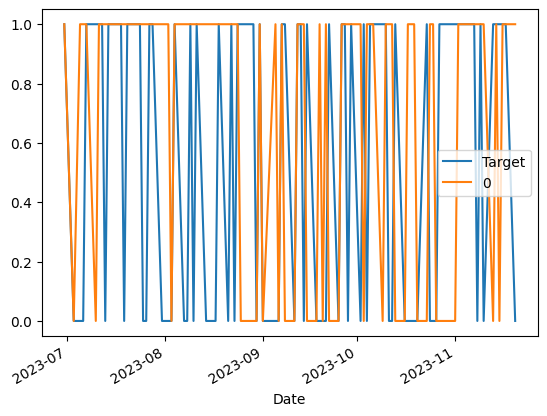

In [ ]:
combined.plot()

#Building a backtesting system

In [ ]:
def predict(train,test,predictors,model):
  model.fit(train[predictors],train['Target'])
  preds=model.predict(test[predictors])
  preds=pd.Series(preds,index=test.index,name="Predictions")
  combined=pd.concat([test['Target'],preds],axis=1)
  return combined


In [ ]:
def backtest(data,model,predicitors,start=2500,step=250):
  all_predictions=[]
  for i in range(start,data.shape[0],step):
    train=data.iloc[0:i].copy()
    test=data.iloc[i:(i+step)].copy()
    predicitors=predict(train,test,predictors,model)
    all_predictions.append(predicitors)
    return pd.concat(all_predictions)

In [ ]:
predictions=backtest(sp500,model,predictors)

In [ ]:
predictions["Predictions"].value_counts()

0    128
1    122
Name: Predictions, dtype: int64

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
1928-01-09 00:00:00-05:00,17.500000,17.500000,17.500000,17.500000,0,17.370001,0
...,...,...,...,...,...,...,...
2023-11-14 00:00:00-05:00,4458.970215,4508.669922,4458.970215,4495.700195,4700350000,4502.879883,1
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000,4508.240234,1
2023-11-16 00:00:00-05:00,4497.080078,4511.990234,4487.830078,4508.240234,3964520000,4514.020020,1


from matplotlib import pyplot as plt
sp500['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sp500['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sp500['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sp500['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sp500.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sp500.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sp500.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sp500.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sp500['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sp500['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sp500['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sp500['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
precision_score(predictions['Target'],predictions["Predictions"])

0.5081967213114754

In [ ]:
predictions['Target'].value_counts()/predictions.shape[0]

0    0.508
1    0.492
Name: Target, dtype: float64

In [ ]:
horizons=[2,5,60,350,1000]
new_predictors=[]
for horizon in horizons:
  rolling_averages=sp500.rolling(horizon).mean()

  ratio_column=f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

  trend_column=f"Trend_{horizon}"
  sp500[trend_column]=sp500.shift(1).rolling(horizon).sum()['Target']

  new_predictors +=[ratio_column,trend_column]


In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_350,Trend_350,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0,0.998873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1,0.995180,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0,1.003124,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-09 00:00:00-05:00,17.500000,17.500000,17.500000,17.500000,0,17.370001,0,0.995449,1.0,0.992176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-14 00:00:00-05:00,4458.970215,4508.669922,4458.970215,4495.700195,4700350000,4502.879883,1,1.009447,1.0,1.019312,3.0,1.031997,32.0,1.092687,169.0,1.145022,528.0
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000,4508.240234,1,1.000798,2.0,1.015410,3.0,1.033189,33.0,1.093974,170.0,1.146451,528.0
2023-11-16 00:00:00-05:00,4497.080078,4511.990234,4487.830078,4508.240234,3964520000,4514.020020,1,1.000595,2.0,1.009295,4.0,1.034133,33.0,1.094755,171.0,1.147416,528.0


In [ ]:
sp500=sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_350,Trend_350,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1931-12-30 00:00:00-05:00,8.100000,8.100000,8.100000,8.100000,0,8.120000,1,1.008717,2.0,1.019381,3.0,0.837787,25.0,0.542215,154.0,0.401432,521.0
1931-12-31 00:00:00-05:00,8.120000,8.120000,8.120000,8.120000,0,7.560000,0,1.001233,2.0,1.017544,4.0,0.842149,25.0,0.544820,155.0,0.402615,522.0
1932-01-04 00:00:00-05:00,7.560000,7.560000,7.560000,7.560000,0,7.550000,0,0.964286,1.0,0.956962,3.0,0.785781,25.0,0.508498,154.0,0.375034,522.0
1932-01-05 00:00:00-05:00,7.550000,7.550000,7.550000,7.550000,0,8.080000,1,0.999338,0.0,0.960804,3.0,0.787963,24.0,0.509032,154.0,0.374726,521.0
1932-01-06 00:00:00-05:00,8.080000,8.080000,8.080000,8.080000,0,8.220000,1,1.033909,1.0,1.025121,3.0,0.845778,25.0,0.546034,154.0,0.401219,522.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-13 00:00:00-05:00,4406.660156,4421.759766,4393.819824,4411.549805,3326240000,4495.700195,1,0.999582,1.0,1.005582,3.0,1.013052,32.0,1.072669,169.0,1.123986,528.0
2023-11-14 00:00:00-05:00,4458.970215,4508.669922,4458.970215,4495.700195,4700350000,4502.879883,1,1.009447,1.0,1.019312,3.0,1.031997,32.0,1.092687,169.0,1.145022,528.0
2023-11-15 00:00:00-05:00,4505.299805,4521.169922,4495.310059,4502.879883,4347170000,4508.240234,1,1.000798,2.0,1.015410,3.0,1.033189,33.0,1.093974,170.0,1.146451,528.0


from matplotlib import pyplot as plt
sp500['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sp500['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sp500['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sp500['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sp500.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sp500.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sp500.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sp500.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sp500['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sp500['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sp500['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sp500['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
model=RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)

In [ ]:
def predict(train,test,predictors,model):
  model.fit(train[predictors],train['Target'])
  preds=model.predict_proba(test[predictors])[:,1]
  preds[preds >= .6]=1
  preds[preds <.6]=0
  preds=pd.Series(preds,index=test.index,name="Predictions")
  combined=pd.concat([test['Target'],preds],axis=1)
  return combined


In [ ]:
predictions = backtest(sp500, model ,new_predictors)

In [ ]:
predictions['Predictions'].value_counts()

0.0    222
1.0     28
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions['Target'], predictions['Predictions'])

0.42857142857142855